<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Autocorrelation


### Learning Objectives
 
**After this lesson, you will be able to:**
- Define autocorrelation and list some real-world examples.
- Use the Pandas `autocorr()` function to compute autocorrelation.
- Calculate and plot the ACF and PACF using StatsModels and Pandas.
- Explain why autocorrelation poses a problem for models that assume independence.
---    

<h2><a id = "A">Autocorrelation</a></h2>

While in previous weeks, our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.), in time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values that occur later in time.

Examples:

- In stock market data, the stock price at one point is correlated with the stock price of the point that's directly prior in time. 
- In sales data, sales on a Saturday are likely correlated with sales on the next Saturday and the previous Saturday, as well as other days, perhaps more than the preceding Friday.

> **Check:** What are some examples of autocorrelation that you can think of in the real world?

### How Do We Compute Autocorrelation?

**Recall:** Correlation between $X$ and $Y$:

$${corr(X, Y) = \frac{\operatorname{E}[(X - \mu_X)(Y - \mu_Y)]}{\sigma_X\sigma_Y}}$$

**Now:** The autocorrelation of $X$ for a given "lag" $k$ is just the correlation between $X$ and a "lagged" version of $X$ in which all observations are shifted by $k$ time units:

$${R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}$$

With a _k_ value of one, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one that's 10 time points earlier.

**Note:** It doesn't make much sense to talk about *the* correlation between $X$ and $Y$ if the relationship between $X$ and $Y$ was changing as the dataset was collected. In the same way, it doesn't make much sense to talk about *the* autocorrelation of $X$ with lag $k$ if the relationship between $X$ and its previous values changed over the course of the dataset.

Because time series data is gathered over time, changes in the underlying data-generating process over the course of data collection are particularly common for this kind of data. In a time series context, these kinds of changes are called *non-stationarity*.

### Guided Practice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [2]:
data = pd.read_csv('./data/rossmann.csv', dtype={'StateHoliday': str})

In [5]:
# Cast "Date" column to Pandas Timestamp
data.loc[:, 'Date'] = pd.to_datetime(data.loc[:, 'Date'])

In [12]:
# Make "Date" the row index
data.set_index('Date', inplace=True)

In [10]:
# Look at just Store 1
data.loc[:, 'Store'].value_counts()

1023    942
666     942
675     942
163     942
674     942
162     942
673     942
161     942
672     942
160     942
158     942
157     942
668     942
156     942
667     942
154     942
657     942
665     942
153     942
664     942
152     942
663     942
151     942
662     942
150     942
661     942
148     942
659     942
147     942
658     942
       ... 
636     758
637     758
879     758
638     758
129     758
604     758
365     758
132     758
644     758
646     758
136     758
137     758
629     758
115     758
113     758
890     758
893     758
620     758
108     758
619     758
385     758
612     758
100     758
611     758
99      758
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

In [13]:
store1_data = data.loc[data.loc[:, 'Store'] == 1, :]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


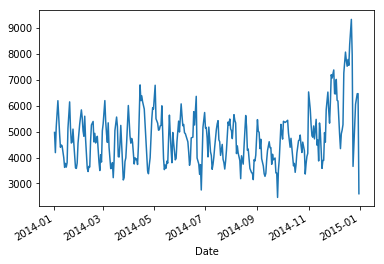

In [17]:
fig, ax = plt.subplots()
#store1_data.loc[:, 'Sales'].plot(ax=ax); # spikes because of weekend and / or holidays
# lets ignore where Sales is not equal 0
sales_open_days = store1_data.loc[store1_data.loc[:, 'Sales'] != 0, 'Sales']
# only for 2015
sales_open_days.loc['2014'].plot(ax=ax);

### Computing Autocorrelation

In [20]:
# Create a 1-unit lagged version of "Sales"
print(store1_data.loc[:, 'Sales'].head())
lagged_sales = store1_data.loc[:, 'Sales'].shift(-1)

Date
2015-07-31    5263
2015-07-30    5020
2015-07-29    4782
2015-07-28    5011
2015-07-27    6102
Name: Sales, dtype: int64


> **Check:** Why is the first value 5020? Why is the last value NaN?

In [21]:
# Compute the correlation between these series and the original "Sales" series
store1_data.loc[:, 'Sales'].corr(lagged_sales)

-0.12732514339140213

In [22]:
# Use .autocorr to compute this autocorrelation in one step
store1_data.loc[:, 'Sales'].autocorr(lag=1)

-0.12732514339140213

In [23]:
# Compute autocorrelation for "Sales" with a lag of 10
store1_data.loc[:, 'Sales'].autocorr(lag=10)

0.006307623893789401

<h2><a id = "B">Plotting Autocorrelation Functions Using StatsModels and Pandas</a></h2>

Pandas provides convenience plots for autocorrelations.

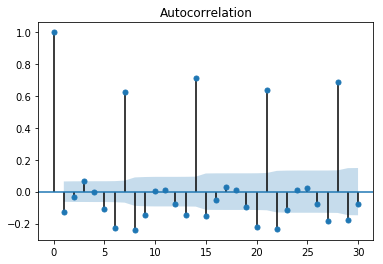

In [26]:
# Make an autocorrelation plot with pandas
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
plot_acf(store1_data.loc[:, 'Sales'], lags=30, ax=ax);

StatsModels also comes with some convenient packages for calculating and plotting autocorrelation. Load up these two functions and try them out.

In [ ]:
# Make an autocorrelation plot with statsmodels


This plots the correlation between the series and a lagged series for the lags indicated on the horizontal axis. For instance, at `0`, the series will be completely correlated with itself, so the blue dot is at `1.0`. The points that fall outside of the blue indicate significant correlation values. Big jumps in autocorrelation appear at lags that are multiples of seven. Our sales data are daily, so it makes a lot of sense that a single Monday's sales would be correlated with the prior Monday's (and the one before it.. and so on) -- especially because every Sunday has zero sales!

These plots reveal seasonality in our time series.

In [27]:
# Get the acf values as an array 
acf(store1_data.loc[:, 'Sales'])

array([ 1.        , -0.12703786, -0.03469319,  0.06454937, -0.00180766,
       -0.10904274, -0.22783504,  0.6248786 , -0.2401515 , -0.14869745,
        0.00624578,  0.01006485, -0.07707318, -0.14363042,  0.71435429,
       -0.15188393, -0.05551585,  0.02901103,  0.01113764, -0.09400308,
       -0.21875595,  0.63865175, -0.23360339, -0.11384778,  0.00788378,
        0.02095157, -0.07841381, -0.18374454,  0.68804836, -0.17930762,
       -0.07734379,  0.01060628, -0.00112696, -0.09014802, -0.21435881,
        0.60668328, -0.230107  , -0.12860469,  0.00378231,  0.00237381,
       -0.10721685])

<h2><a id= "C">Partial Autocorrelation and the Partial Autocorrelation Function (PACF)</a></h2>

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

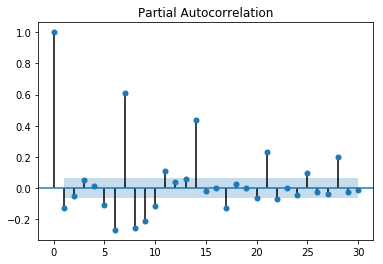

In [29]:
# Plot the partial autocorrelations using statsmodels
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots()
plot_pacf(store1_data.loc[:, 'Sales'], lags=30, ax=ax);

This plots the correlation at a given lag (indicated by the horizontal axis), controlling for all of the previous lags. We continue to see big jumps in correlation at the weekly time lags, but they go down through time. 

**Note:** A lot of this pattern is driven by the zeros on Sundays.

> **Check:** How might seasonality in a data set (monthly, weekly, etc.) show up in autocorrelation plots?

<h2><a id = "D">Problems Posed by Autocorrelation</a></h2>

Suppose we built a linear regression model to predict sales from other features in our dataset. Unfortunately, certain properties of linear regression hold only when the residuals/error terms are independent of one another, and autocorrelation removes this independence. For instance, if our model underestimates sales on Day 20, then it is likely to underestimate them on Day 27 as well, because of the autocorrelation.

> **What are some problems that could arise when using autocorrelated data with a linear model?**
* Estimated regression coefficients are still unbiased, but they are no longer the minimum-variance unbiased estimators.
* The MSE may seriously underestimate the true variance of the errors.
* The standard error of the regression coefficients may seriously underestimate the true standard deviation of the estimated regression coefficients.
* Statistical intervals and inference procedures are no longer strictly applicable.

Statisticians have developed specialized models specifically for time series data because of these issues.

# Recap

* Autocorrelation is a measure of how dependent a data point is on previous data points.
* Investigating ACF and PACF plots can help us identify seasonality in our time series data.
* Simple linear regression is problematic for data with autocorrelations because these data no longer have independent errors.

**Exercise.**

In [30]:
euro = pd.read_csv('./data/euretail.csv')
euro.head()

,Year,Qtr1,Qtr2,Qtr3,Qtr4
0,1996,89.13,89.52,89.88,90.12
1,1997,89.19,89.78,90.03,90.38
2,1998,90.27,90.77,91.85,92.51
3,1999,92.21,92.52,93.62,94.15
4,2000,94.69,95.34,96.04,96.30


- Set "Year" as the index

In [31]:
euro.set_index('Year', inplace=True)

- Run the code below. What is does `.stack()` do?

In [32]:
euro.stack()

Year      
1996  Qtr1     89.13
      Qtr2     89.52
      Qtr3     89.88
      Qtr4     90.12
1997  Qtr1     89.19
      Qtr2     89.78
      Qtr3     90.03
      Qtr4     90.38
1998  Qtr1     90.27
      Qtr2     90.77
      Qtr3     91.85
      Qtr4     92.51
1999  Qtr1     92.21
      Qtr2     92.52
      Qtr3     93.62
      Qtr4     94.15
2000  Qtr1     94.69
      Qtr2     95.34
      Qtr3     96.04
      Qtr4     96.30
2001  Qtr1     94.83
      Qtr2     95.14
      Qtr3     95.86
      Qtr4     95.83
2002  Qtr1     95.73
      Qtr2     96.36
      Qtr3     96.89
      Qtr4     97.01
2003  Qtr1     96.66
      Qtr2     97.76
               ...  
2004  Qtr3     99.31
      Qtr4     99.44
2005  Qtr1     99.43
      Qtr2     99.84
      Qtr3    100.32
      Qtr4    100.40
2006  Qtr1     99.88
      Qtr2    100.19
      Qtr3    100.75
      Qtr4    101.01
2007  Qtr1    100.84
      Qtr2    101.34
      Qtr3    101.94
      Qtr4    102.10
2008  Qtr1    101.56
      Qtr2    101.48
  

In [33]:
euro.head()

,Qtr1,Qtr2,Qtr3,Qtr4
Year,,,,
1996,89.13,89.52,89.88,90.12
1997,89.19,89.78,90.03,90.38
1998,90.27,90.77,91.85,92.51
1999,92.21,92.52,93.62,94.15
2000,94.69,95.34,96.04,96.30


In [34]:
euro = euro.stack()

In [35]:
euro.head()

Year      
1996  Qtr1    89.13
      Qtr2    89.52
      Qtr3    89.88
      Qtr4    90.12
1997  Qtr1    89.19
dtype: float64

`.stack()` takes a DataFrame and turns it into a series with a two-level index by making the column names a new second-level row index for each element of the original index.

- Make a line plot of the values in `euro`

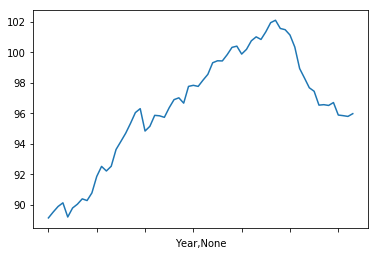

In [41]:
fig, ax = plt.subplots()
euro.loc[:, :].plot(ax=ax);

- Use `plot_acf` and `plot_pacf` to look at the autocorrelation in the data set.

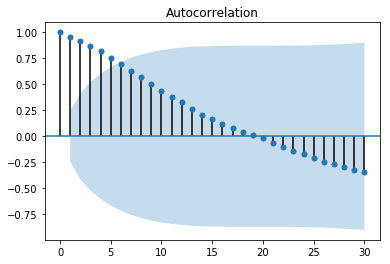

In [42]:
fig, ax = plt.subplots()
plot_acf(euro, lags=30, ax=ax);

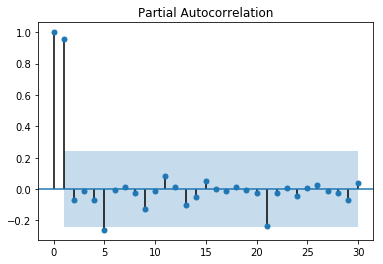

In [43]:
fig, ax = plt.subplots()
plot_pacf(euro, lags=30, ax=ax);

- Interpret your findings.